# Election Prediction Model-2024 

Data sourced from: https://myneta.info/ 



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

## The data for training from 2009-2019

In [2]:
# reading the data and cleaning the data, that is the input
data=pd.read_excel('election.xlsx')
data['Total Assets'] = data['Total Assets'].apply(lambda x:str(x).split('~')[0]).apply(lambda x:str(x).split('_')[0]).apply(lambda x:str(x).split('\n')[0])
data['Total Assets'] = data['Total Assets'].apply(lambda x:str(x).replace(',','')).apply(lambda x:str(x).replace('Rs','').strip())
data['Liabilities'] = data['Liabilities'].apply(lambda x:str(x).split('~')[0]).apply(lambda x:str(x).split('_')[0]).apply(lambda x:str(x).split('\n')[0])
data['Liabilities'] = data['Liabilities'].apply(lambda x:str(x).replace(',','')).apply(lambda x:str(x).replace('Rs','').strip())
data['Total Assets'] = data['Total Assets'].apply(lambda x:x.replace('Nil',str(np.nan)))
data['Liabilities'] = data['Liabilities'].apply(lambda x:x.replace('Nil',str(np.nan)))
data['Total Assets'] = data['Total Assets'].astype(float)
data['Liabilities'] = data['Liabilities'].astype(float)
data['Total Assets'] = data['Total Assets'].fillna(data['Total Assets'].mean())
data['Liabilities'] = data['Liabilities'].fillna(0)

In [3]:
data.head(5)

,Candidate,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Winner
0,Shashi TharoorWinner,Trivandrum,INC,1,Doctorate,53,212442472.0,0.0,2009,1
1,Adv Ramachandran Nair P,Trivandrum,CPI,0,Graduate Professional,57,2157292.0,638195.0,2009,0
2,Ajith Kumar K,Trivandrum,IND,0,12th Pass,41,60000.0,0.0,2009,0
3,Dileep,Trivandrum,IND,0,Graduate,28,40500.0,0.0,2009,0
4,G Ashokan,Trivandrum,IND,0,8th Pass,47,2000.0,0.0,2009,0


In [4]:
data.isnull().sum()

Candidate         0
Constituency      0
Party             0
Criminal Cases    0
Education         0
Age               0
Total Assets      0
Liabilities       0
Year              0
Winner            0
dtype: int64

## The data for 2024 prediction

In [5]:
# reading the data and cleaning the data, that is the for 2024 prediction
p_data = pd.read_excel('2024.xlsx')
p_data['Total Assets'] = p_data['Total Assets'].apply(lambda x:str(x).split('~')[0]).apply(lambda x:str(x).split('_')[0]).apply(lambda x:str(x).split('\n')[0])
p_data['Total Assets'] = p_data['Total Assets'].apply(lambda x:str(x).replace(',','')).apply(lambda x:str(x).replace('Rs','').strip())
p_data['Liabilities'] = p_data['Liabilities'].apply(lambda x:str(x).split('~')[0]).apply(lambda x:str(x).split('_')[0]).apply(lambda x:str(x).split('\n')[0])
p_data['Liabilities'] = p_data['Liabilities'].apply(lambda x:str(x).replace(',','')).apply(lambda x:str(x).replace('Rs','').strip())
p_data['Total Assets'] = p_data['Total Assets'].apply(lambda x:x.replace('Nil',str(np.nan)))
p_data['Liabilities'] = p_data['Liabilities'].apply(lambda x:x.replace('Nil',str(np.nan)))
p_data['Total Assets'] = p_data['Total Assets'].astype(float)
p_data['Liabilities'] = p_data['Liabilities'].astype(float)
p_data['Total Assets'] = p_data['Total Assets'].fillna(p_data['Total Assets'].mean())
p_data['Liabilities'] = p_data['Liabilities'].fillna(0)

In [6]:
p_data.head(5)

,Candidate,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year
0,A. M Ariff,Alappuzha,CPI(M),3,Graduate Professional,59,1.321630e+07,6095458.0,2024
1,Adv.K.M Shajahan,Alappuzha,IND,5,Post Graduate,62,1.899451e+07,4490000.0,2024
2,Arjunan,Alappuzha,SUCI(C),0,Others,60,3.646958e+06,160000.0,2024
3,Jayakrishnan P,Alappuzha,IND,0,12th Pass,49,9.105308e+06,483609.0,2024
4,Jyothi Abraham,Alappuzha,IND,0,10th Pass,43,2.346192e+07,0.0,2024


## Adding Coalation related Opinion Poll percentage

In [7]:
# Taking into consideration the coalition politics from 2009-2019
NDA = ['BJP', 'Bharath Dharma Jana Sena']
UDF = ['INC','Kerala Congress (M)','KC(M)','Indian Union Muslim League','Revolutionary Socialist Party','IUML']
LDF = ['CPI','CPI(M)','Marxist Communist Party of India e(United)',"JD(U)",'RJD','JD(S)','CPM',]

In [8]:
NDA_24= ['BJP', 'Bharath Dharma Jana Sena']
UDF_24 = ['INC',"Kerala Congress",'Indian Union Muslim League','Revolutionary Socialist Party','IUML']
LDF_24 = ['CPI','CPI(M)','Marxist Communist Party of India e(United)',"JD(U)",'RJD','JD(S)','CPM','Kerala Congress (M)']

In [9]:
#TRAIN DATA

data["Coalition"] =  data["Party"].apply(lambda x :"NDA" if x in NDA else ("UDF" if x in UDF else ("LDF" if x in LDF else "OTHERS")))
data.loc[data["Year"] == 2019, "Vote_Percent"] = data[data["Year"] == 2019]["Coalition"].apply(lambda x: 43 if x == "UDF" else (32 if x == "LDF" else (13 if x == "NDA" else 0)))
data.loc[data["Year"] == 2009, "Vote_Percent"] = data[data["Year"] == 2009]["Coalition"].apply(lambda x: 45 if x == "UDF" else (37.9 if x == "LDF" else (6.3 if x == "NDA" else 0)))
data.loc[data["Year"] == 2014, "Vote_Percent"] = data[data["Year"] == 2014]["Coalition"].apply(lambda x: 35 if x == "UDF" else (28 if x == "LDF" else (10.5 if x == "NDA" else 0)))


In [10]:
#TEST DATA

p_data["Coalition"] =  p_data["Party"].apply(lambda x :"NDA" if x in NDA_24 else ("UDF" if x in UDF_24 else ("LDF" if x in LDF_24 else "OTHERS")))
p_data.loc[p_data["Year"] == 2024, "Vote_Percent"] = p_data[p_data["Year"] == 2024]["Coalition"].apply(lambda x: 41.58 if x == "UDF" else (36.67 if x == "LDF" else (20.08 if x == "NDA" else 0)))
p_data

,Candidate,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Coalition,Vote_Percent
0,A. M Ariff,Alappuzha,CPI(M),3,Graduate Professional,59,1.321630e+07,6095458.0,2024,LDF,36.67
1,Adv.K.M Shajahan,Alappuzha,IND,5,Post Graduate,62,1.899451e+07,4490000.0,2024,OTHERS,0.00
2,Arjunan,Alappuzha,SUCI(C),0,Others,60,3.646958e+06,160000.0,2024,OTHERS,0.00
3,Jayakrishnan P,Alappuzha,IND,0,12th Pass,49,9.105308e+06,483609.0,2024,OTHERS,0.00
4,Jyothi Abraham,Alappuzha,IND,0,10th Pass,43,2.346192e+07,0.0,2024,OTHERS,0.00
...,...,...,...,...,...,...,...,...,...,...,...
183,Kodikunnil Suresh,Mavelikkara,INC,6,Graduate Professional,60,2.346192e+07,0.0,2024,UDF,41.58
184,Kozhuvasseril Suresh,Mavelikkara,IND,0,8th Pass,53,1.947354e+06,40000.0,2024,OTHERS,0.00
185,Manthara Velayudhan,Mavelikkara,IND,0,12th Pass,53,1.412000e+06,250000.0,2024,OTHERS,0.00
186,Santhosh Palathumpadan,Mavelikkara,BSP,0,10th Pass,47,3.574000e+06,350000.0,2024,OTHERS,0.00


In [11]:
# Removing Candidates from Data 
data = data.iloc[:,1:]
data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Winner,Coalition,Vote_Percent
0,Trivandrum,INC,1,Doctorate,53,212442472.0,0.0,2009,1,UDF,45.0
1,Trivandrum,CPI,0,Graduate Professional,57,2157292.0,638195.0,2009,0,LDF,37.9
2,Trivandrum,IND,0,12th Pass,41,60000.0,0.0,2009,0,OTHERS,0.0
3,Trivandrum,IND,0,Graduate,28,40500.0,0.0,2009,0,OTHERS,0.0
4,Trivandrum,IND,0,8th Pass,47,2000.0,0.0,2009,0,OTHERS,0.0


In [12]:
#Removing candidates from P_data

p_data= p_data.iloc[:,1:]
p_data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Coalition,Vote_Percent
0,Alappuzha,CPI(M),3,Graduate Professional,59,1.321630e+07,6095458.0,2024,LDF,36.67
1,Alappuzha,IND,5,Post Graduate,62,1.899451e+07,4490000.0,2024,OTHERS,0.00
2,Alappuzha,SUCI(C),0,Others,60,3.646958e+06,160000.0,2024,OTHERS,0.00
3,Alappuzha,IND,0,12th Pass,49,9.105308e+06,483609.0,2024,OTHERS,0.00
4,Alappuzha,IND,0,10th Pass,43,2.346192e+07,0.0,2024,OTHERS,0.00


In [13]:
party = {'CPI(M)': 1,
 'IND': 2,
 'SUCI(C)': 3,
 'INC': 4,
 'BSP': 5,
 'Bahujan Dravida Party': 6,
 'BJP': 7,
 'Twenty 20 Party': 8,
 'Bharath Dharma Jana Sena': 9,
 'Viduthalai Chiruthaigal Katchi': 10,
 'Bharatheeya Jawan Kisan Party': 11,
 'Ambedkarite Party of India': 12,
 'Revolutionary Socialist Party': 13,
 'Marxist Communist Party of India (United)': 14,
 'Kerala Congress': 15,
 'Samajwadi Jan Parishad': 16,
 'Kerala Congress (M)': 17,
 'Indian Union Muslim League': 18,
 'Peoples Party of India(secular)': 19,
 'CPI': 20,
 'New Labour Party': 21,
 'NCP': 22,
 'SHS': 23,
 'AAP': 24,
 'SDPI': 25,
 'Socialist Republican Party': 26,
 'RPI': 27,
 'RPI(A)': 28,
 'Pravasi Nivasi Party': 29,
 'RLD': 30,
 'CPM': 31,
 'AITC': 32,
 'Social Action Party': 33,
 'JD(U)': 34,
 'CPI(ML) Red star': 35,
 'Indian Gandhiyan Party': 36,
 'CPI(ML) Red Star': 35,
 'Socialist Janata (Democratic)': 38,
 'Welfare Party Of India': 39,
 'MUL': 40,
 'IUML': 18,
 'KEC': 15,
 'KEC(M)': 17,
 'Revolutionary Socialist Party of Kerala (B)': 44,
 'RJD': 45,
 'RSP': 13,
 'KC(M)': 17,
 'JD(S)': 48,
 'Welfare Party of India': 49,
 'Peoples Democratic Party': 50,
 'Samajwadi Forward Bloc': 51,
 'Rashtriya Samaj Paksha': 52,
 'Secular Democratic Congress': 53,
 'Agila India Makkal Kazhagam': 54,
 'National Labour Party': 55}

data  = data.replace(party)
p_data = p_data.replace(party)

In [14]:
Education = {'Graduate': 115,
 '12th Pass': 112,
 'Not Given': 100,
 '10th Pass': 104,
 'Others': 100,
 'Post Graduate': 117,
 'Graduate Professional': 118,
 '8th Pass': 108,
 'Doctorate': 120,
 'Literate': 105,
 '5th Pass': 105,
 'Illiterate': -1}
data = data.replace(Education)
p_data = p_data.replace(Education)

In [15]:
#To convert Constituency to Numeric Values
const_list = data["Constituency"].unique().tolist()
const = {const_list[i]: i+1001 for i,j in enumerate(const_list)}
data = data.replace(const)
p_data = p_data.replace(const)

In [16]:
pp = {'Thiruvananthapuram':1001}
p_data = p_data.replace(pp)

In [17]:
pp

{'Thiruvananthapuram': 1001}

In [18]:
data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Winner,Coalition,Vote_Percent
0,1001,4,1,120,53,212442472.0,0.0,2009,1,UDF,45.0
1,1001,20,0,118,57,2157292.0,638195.0,2009,0,LDF,37.9
2,1001,2,0,112,41,60000.0,0.0,2009,0,OTHERS,0.0
3,1001,2,0,115,28,40500.0,0.0,2009,0,OTHERS,0.0
4,1001,2,0,108,47,2000.0,0.0,2009,0,OTHERS,0.0


In [19]:
p_data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Coalition,Vote_Percent
0,1022,1,3,118,59,1.321630e+07,6095458.0,2024,LDF,36.67
1,1022,2,5,117,62,1.899451e+07,4490000.0,2024,OTHERS,0.00
2,1022,3,0,100,60,3.646958e+06,160000.0,2024,OTHERS,0.00
3,1022,2,0,112,49,9.105308e+06,483609.0,2024,OTHERS,0.00
4,1022,2,0,104,43,2.346192e+07,0.0,2024,OTHERS,0.00


In [20]:
data= data.loc[:, ["Constituency","Party", "Criminal Cases", "Education", "Age", "Total Assets", "Liabilities", "Year","Winner","Vote_Percent"]]
data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Winner,Vote_Percent
0,1001,4,1,120,53,212442472.0,0.0,2009,1,45.0
1,1001,20,0,118,57,2157292.0,638195.0,2009,0,37.9
2,1001,2,0,112,41,60000.0,0.0,2009,0,0.0
3,1001,2,0,115,28,40500.0,0.0,2009,0,0.0
4,1001,2,0,108,47,2000.0,0.0,2009,0,0.0


In [21]:
p_data= p_data.loc[:, ["Constituency","Party", "Criminal Cases", "Education", "Age", "Total Assets", "Liabilities", "Year","Vote_Percent"]]
p_data.head(5)

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent
0,1022,1,3,118,59,1.321630e+07,6095458.0,2024,36.67
1,1022,2,5,117,62,1.899451e+07,4490000.0,2024,0.00
2,1022,3,0,100,60,3.646958e+06,160000.0,2024,0.00
3,1022,2,0,112,49,9.105308e+06,483609.0,2024,0.00
4,1022,2,0,104,43,2.346192e+07,0.0,2024,0.00


## Using RandomFOrest

## Using Py Caret

In [78]:
import joblib

### We trained the model with  Random Forest

Accuracy - 0.9610 

AUC - 0.9427

Recall - 0.6550

Precision - 0.9217

F1 Score - 0.7353

In [39]:
# Load the model from the file
model = joblib.load('election_model.joblib')

In [59]:
# used to predict
pdf = predict_model(model,data = p_data)
pdf

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent,prediction_label,prediction_score
0,1022,1,3,118,59,13216302.0,6095458.0,2024,36.669998,0,0.51
1,1022,2,5,117,62,18994512.0,4490000.0,2024,0.000000,0,0.73
2,1022,3,0,100,60,3646958.0,160000.0,2024,0.000000,0,0.94
3,1022,2,0,112,49,9105308.0,483609.0,2024,0.000000,0,0.94
4,1022,2,0,104,43,23461924.0,0.0,2024,0.000000,0,0.90
...,...,...,...,...,...,...,...,...,...,...,...
183,1018,4,6,118,60,23461924.0,0.0,2024,41.580002,1,0.88
184,1018,2,0,108,53,1947354.0,40000.0,2024,0.000000,0,0.95
185,1018,2,0,112,53,1412000.0,250000.0,2024,0.000000,0,0.95
186,1018,5,0,104,47,3574000.0,350000.0,2024,0.000000,0,0.92


In [60]:
def map_const(name):
    for key, value in const.items():
        if value == name:
            return key
    return None  # Return None if no match found

# Apply the mapping function to create the "Candy" column in Final
pdf["Constiuency Name"] = pdf["Constituency"].apply(map_const)

#________________________________________________________________________#

def map_party(name):
    for key, value in party.items():
        if value == name:
            return key
    return None  # Return None if no match found

# Apply the mapping function to create the "Candy" column in Final
pdf["Party Name"] = pdf["Party"].apply(map_party)

#________________________________________________________________________#

In [61]:
# to save prediction  as csv
pdf.to_csv("Results.csv")

In [62]:
pdf

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent,prediction_label,prediction_score,Constiuency Name,Party Name
0,1022,1,3,118,59,13216302.0,6095458.0,2024,36.669998,0,0.51,Alappuzha,CPI(M)
1,1022,2,5,117,62,18994512.0,4490000.0,2024,0.000000,0,0.73,Alappuzha,IND
2,1022,3,0,100,60,3646958.0,160000.0,2024,0.000000,0,0.94,Alappuzha,SUCI(C)
3,1022,2,0,112,49,9105308.0,483609.0,2024,0.000000,0,0.94,Alappuzha,IND
4,1022,2,0,104,43,23461924.0,0.0,2024,0.000000,0,0.90,Alappuzha,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1018,4,6,118,60,23461924.0,0.0,2024,41.580002,1,0.88,Mavelikkara,INC
184,1018,2,0,108,53,1947354.0,40000.0,2024,0.000000,0,0.95,Mavelikkara,IND
185,1018,2,0,112,53,1412000.0,250000.0,2024,0.000000,0,0.95,Mavelikkara,IND
186,1018,5,0,104,47,3574000.0,350000.0,2024,0.000000,0,0.92,Mavelikkara,BSP


In [63]:
# Add Coalition column
pdf["Coalition"] =  pdf["Party Name"].apply(lambda x :"NDA" if x in NDA_24 else ("UDF" if x in UDF_24 else ("LDF" if x in LDF_24 else "OTHERS")))

In [64]:
pdf

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent,prediction_label,prediction_score,Constiuency Name,Party Name,Coalition
0,1022,1,3,118,59,13216302.0,6095458.0,2024,36.669998,0,0.51,Alappuzha,CPI(M),LDF
1,1022,2,5,117,62,18994512.0,4490000.0,2024,0.000000,0,0.73,Alappuzha,IND,OTHERS
2,1022,3,0,100,60,3646958.0,160000.0,2024,0.000000,0,0.94,Alappuzha,SUCI(C),OTHERS
3,1022,2,0,112,49,9105308.0,483609.0,2024,0.000000,0,0.94,Alappuzha,IND,OTHERS
4,1022,2,0,104,43,23461924.0,0.0,2024,0.000000,0,0.90,Alappuzha,IND,OTHERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1018,4,6,118,60,23461924.0,0.0,2024,41.580002,1,0.88,Mavelikkara,INC,UDF
184,1018,2,0,108,53,1947354.0,40000.0,2024,0.000000,0,0.95,Mavelikkara,IND,OTHERS
185,1018,2,0,112,53,1412000.0,250000.0,2024,0.000000,0,0.95,Mavelikkara,IND,OTHERS
186,1018,5,0,104,47,3574000.0,350000.0,2024,0.000000,0,0.92,Mavelikkara,BSP,OTHERS


In [65]:
# Get only winner data
pdf = pdf[pdf['prediction_label']==1]

In [66]:
pdf

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Year,Vote_Percent,prediction_label,prediction_score,Constiuency Name,Party Name,Coalition
5,1022,4,1,117,61,36342460.0,272817.0,2024,41.580002,1,0.72,Alappuzha,INC,UDF
13,1005,4,9,104,38,23461924.0,0.0,2024,41.580002,1,0.65,Alathur,INC,UDF
18,1008,1,1,118,58,23461924.0,0.0,2024,36.669998,1,0.55,Attingal,CPI(M),LDF
22,1009,4,5,115,71,35020208.0,7893411.0,2024,41.580002,1,0.85,Chalakudy,INC,UDF
26,1009,1,0,117,68,40306184.0,4482706.0,2024,36.669998,1,0.59,Chalakudy,CPI(M),LDF
34,1011,4,10,115,40,23461924.0,0.0,2024,41.580002,1,0.66,Ernakulam,INC,UDF
39,1012,4,88,117,42,20797764.0,3619970.0,2024,41.580002,1,0.80,Idukki,INC,UDF
51,1010,4,14,117,75,62979920.0,5933624.0,2024,41.580002,1,0.83,Kannur,INC,UDF
53,1010,1,9,118,63,14448542.0,0.0,2024,36.669998,1,0.61,Kannur,CPI(M),LDF
61,1013,1,0,104,74,27545988.0,0.0,2024,36.669998,1,0.60,Kasargod,CPI(M),LDF


In [67]:
# to select relevant column only
pdf = pdf.iloc[:,9:]

In [68]:
pdf

,prediction_label,prediction_score,Constiuency Name,Party Name,Coalition
5,1,0.72,Alappuzha,INC,UDF
13,1,0.65,Alathur,INC,UDF
18,1,0.55,Attingal,CPI(M),LDF
22,1,0.85,Chalakudy,INC,UDF
26,1,0.59,Chalakudy,CPI(M),LDF
34,1,0.66,Ernakulam,INC,UDF
39,1,0.80,Idukki,INC,UDF
51,1,0.83,Kannur,INC,UDF
53,1,0.61,Kannur,CPI(M),LDF
61,1,0.60,Kasargod,CPI(M),LDF


## To arrive a conclusion we manually gave  a metric

if same constituencies have multiple winners we create a column and give Contest status

it the prediction score is too near by we will conclude too close

and at the end we take one who has highest prediction score as winner

In [69]:
def filter_and_label(group):
    if len(group) == 1:
        group['Contest Type'] = 'Normal'
        return group
    else:
        sorted_group = group.sort_values(by='prediction_score', ascending=False)
        if sorted_group.iloc[0]['prediction_score'] - sorted_group.iloc[1]['prediction_score'] < 0.1:
            sorted_group['Contest Type'] = 'Too Close'
            return sorted_group
        if sorted_group.iloc[0]['prediction_score'] - sorted_group.iloc[1]['prediction_score'] < 0.2:
            sorted_group['Contest Type'] = 'Close'
            return sorted_group
        else:
            top_row = sorted_group.iloc[[0]]
            top_row['Contest Type'] = 'Normal'
            return top_row

# Apply the function to each group
result = pdf.groupby('Constiuency Name').apply(filter_and_label).reset_index(drop=True)

result

,prediction_label,prediction_score,Constiuency Name,Party Name,Coalition,Contest Type
0,1,0.72,Alappuzha,INC,UDF,Normal
1,1,0.65,Alathur,INC,UDF,Normal
2,1,0.55,Attingal,CPI(M),LDF,Normal
3,1,0.85,Chalakudy,INC,UDF,Normal
4,1,0.66,Ernakulam,INC,UDF,Normal
5,1,0.80,Idukki,INC,UDF,Normal
6,1,0.83,Kannur,INC,UDF,Normal
7,1,0.89,Kasargod,INC,UDF,Normal
8,1,0.84,Kollam,Revolutionary Socialist Party,UDF,Close
9,1,0.66,Kollam,CPI(M),LDF,Close


Renaming columns for making it meaningful

In [70]:
# below code we take the result and select only the one with best prediction score
f1_df = result.loc[result.groupby('Constiuency Name')['prediction_score'].idxmax()]
f1_df = f1_df.rename(columns={
    'prediction_label': 'Label',
    'prediction_score': 'Prediction Score',
    'Constiuency Name': 'Constituency Name',
    'Party Name': 'Winning Party Name',
    'Coalition': 'Winning Coalition Name',
    'Contest Type': 'Contest Type'
})
f1_df

,Label,Prediction Score,Constituency Name,Winning Party Name,Winning Coalition Name,Contest Type
0,1,0.72,Alappuzha,INC,UDF,Normal
1,1,0.65,Alathur,INC,UDF,Normal
2,1,0.55,Attingal,CPI(M),LDF,Normal
3,1,0.85,Chalakudy,INC,UDF,Normal
4,1,0.66,Ernakulam,INC,UDF,Normal
5,1,0.80,Idukki,INC,UDF,Normal
6,1,0.83,Kannur,INC,UDF,Normal
7,1,0.89,Kasargod,INC,UDF,Normal
8,1,0.84,Kollam,Revolutionary Socialist Party,UDF,Close
10,1,0.84,Kottayam,Kerala Congress,UDF,Too Close


In [77]:
# Remove Prediction Label-- this would be final result
f1_df[['Constituency Name','Winning Party Name', 'Winning Coalition Name', 'Prediction Score', 'Contest Type']]

,Constituency Name,Winning Party Name,Winning Coalition Name,Prediction Score,Contest Type
0,Alappuzha,INC,UDF,0.72,Normal
1,Alathur,INC,UDF,0.65,Normal
2,Attingal,CPI(M),LDF,0.55,Normal
3,Chalakudy,INC,UDF,0.85,Normal
4,Ernakulam,INC,UDF,0.66,Normal
5,Idukki,INC,UDF,0.80,Normal
6,Kannur,INC,UDF,0.83,Normal
7,Kasargod,INC,UDF,0.89,Normal
8,Kollam,Revolutionary Socialist Party,UDF,0.84,Close
10,Kottayam,Kerala Congress,UDF,0.84,Too Close


### To manually correct codes

eg : Sometimes BJP and Bharatiya Janatha Party , INC and  Indian National Congress will be there so we need single code for it

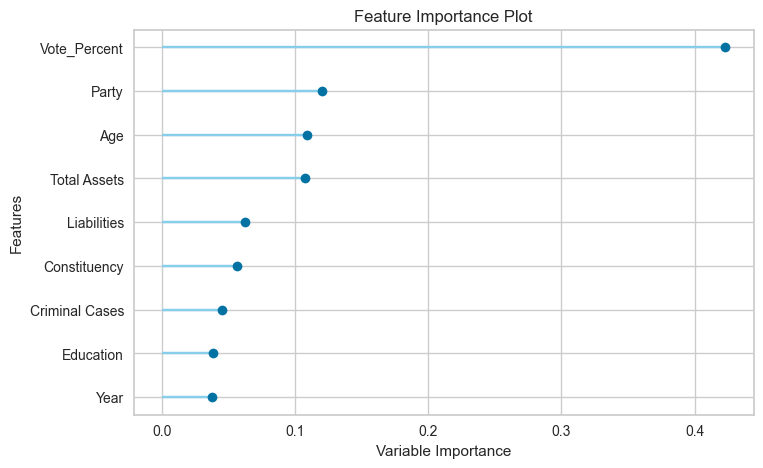

In [74]:
plot_model(best, plot = 'feature')

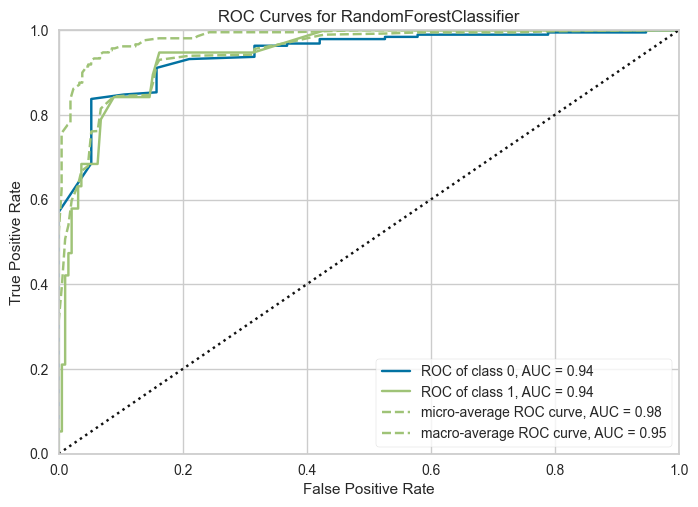

In [60]:
plot_model(best, plot = 'auc')